In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Company_Data (1).csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df['Sales'] = pd.cut(x=df['Sales'], bins=[1, 10, 20], labels=['Lows', 'Highs'], right=False)

In [4]:
df.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Lows,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Highs,111,48,16,260,83,Good,65,10,Yes,Yes


In [5]:
df.dtypes

Sales          category
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc        object
Age               int64
Education         int64
Urban            object
US               object
dtype: object

In [6]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df.isnull().sum()

Sales          5
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          395 non-null category
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: category(1), int64(7), object(3)
memory usage: 31.8+ KB


In [9]:
df.isnull().sum()

Sales          5
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lbe = LabelEncoder()

In [12]:
df["ShelveLoc"] = lbe.fit_transform(df["ShelveLoc"])
df["Urban"] = lbe.fit_transform(df["Urban"])
df["US"] = lbe.fit_transform(df["US"])


In [13]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Lows,138,73,11,276,120,0,42,17,1,1
1,Highs,111,48,16,260,83,1,65,10,1,1
2,Highs,113,35,10,269,80,2,59,12,1,1
3,Lows,117,100,4,466,97,2,55,14,1,1
4,Lows,141,64,3,340,128,0,38,13,1,0


In [14]:
X = df.drop(['Sales'],axis = 1)
X.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1


In [15]:
Y=df.iloc[:,0]


In [16]:
Y = Y.fillna(Y.value_counts().index[0])

In [17]:
Y.isnull().sum()

0

In [18]:
Y.dtype

CategoricalDtype(categories=['Lows', 'Highs'], ordered=True)

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model = RandomForestClassifier(n_estimators=3)
model.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
model.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=722065991, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=566972767, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                   

In [24]:
Y_predictions = model.predict(X_test)
Y_predictions 

array(['Lows', 'Highs', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows', 'Highs',
       'Highs', 'Highs', 'Lows', 'Lows', 'Lows', 'Lows', 'Highs', 'Lows',
       'Highs', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows',
       'Highs', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows',
       'Highs', 'Lows', 'Lows', 'Lows', 'Lows', 'Highs', 'Lows', 'Lows',
       'Lows', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows',
       'Lows', 'Lows', 'Lows', 'Highs', 'Highs', 'Lows', 'Lows', 'Lows',
       'Lows', 'Highs', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows',
       'Lows', 'Lows', 'Highs', 'Highs', 'Highs', 'Lows', 'Lows', 'Lows',
       'Highs', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows', 'Lows'],
      dtype=object)

In [25]:
scores = model.score(X_test,Y_test)
scores

0.775

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predictions)
cm

array([[ 7,  9],
       [ 9, 55]], dtype=int64)

Text(69.0, 0.5, 'Truth')

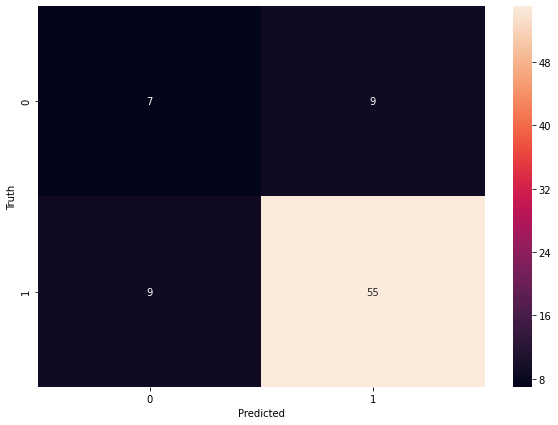

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [138]:
#Find the root of the decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\karale_M\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [139]:
dot_data=StringIO()
export_graphviz(model,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Company_Data.png')

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [29]:
fn=X.names
cn=Y.names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

AttributeError: 'DataFrame' object has no attribute 'names'

In [34]:
from sklearn.tree import export_graphviz
export_graphviz(model,
                feature_names=X.columns,
                filled=True,
                rounded=True)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.